In [1]:
import pandas as pd

In [2]:
transaction=pd.read_csv('Retail_Data_Transactions.csv')
transaction

,customer_id,trans_date,tran_amount
0,CS5295,11-Feb-13,35
1,CS4768,15-Mar-15,39
2,CS2122,26-Feb-13,52
3,CS1217,16-Nov-11,99
4,CS1850,20-Nov-13,78
...,...,...,...
124995,CS8433,26-Jun-11,64
124996,CS7232,19-Aug-14,38
124997,CS8731,28-Nov-14,42
124998,CS8133,14-Dec-13,13


In [3]:
response=pd.read_csv('Retail_Data_response.csv')
response

,customer_id,response
0,CS1112,0
1,CS1113,0
2,CS1114,1
3,CS1115,1
4,CS1116,1
...,...,...
6879,CS8996,0
6880,CS8997,0
6881,CS8998,0
6882,CS8999,0


In [4]:
df=transaction.merge(response, on='customer_id' , how='left')

In [5]:
df.head()

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1.0
1,CS4768,15-Mar-15,39,1.0
2,CS2122,26-Feb-13,52,0.0
3,CS1217,16-Nov-11,99,0.0
4,CS1850,20-Nov-13,78,0.0


In [6]:
df.dtypes
df.shape

(125000, 4)

In [7]:
df.describe()

,tran_amount,response
count,125000.000000,124969.000000
mean,64.991912,0.110763
std,22.860006,0.313840
min,10.000000,0.000000
25%,47.000000,0.000000
50%,65.000000,0.000000
75%,83.000000,0.000000
max,105.000000,1.000000


In [8]:
df=df.dropna()

In [9]:
#missing values
df.isnull().sum()

customer_id    0
trans_date     0
tran_amount    0
response       0
dtype: int64

In [12]:
#changing data types
df['trans_date']=pd.to_datetime(df['trans_date'])
df['response']=df['response'].astype('int64')

In [13]:
df

,customer_id,trans_date,tran_amount,response
0,CS5295,2013-02-11,35,1
1,CS4768,2015-03-15,39,1
2,CS2122,2013-02-26,52,0
3,CS1217,2011-11-16,99,0
4,CS1850,2013-11-20,78,0
...,...,...,...,...
124995,CS8433,2011-06-26,64,0
124996,CS7232,2014-08-19,38,0
124997,CS8731,2014-11-28,42,0
124998,CS8133,2013-12-14,13,0


In [14]:
df

,customer_id,trans_date,tran_amount,response
0,CS5295,2013-02-11,35,1
1,CS4768,2015-03-15,39,1
2,CS2122,2013-02-26,52,0
3,CS1217,2011-11-16,99,0
4,CS1850,2013-11-20,78,0
...,...,...,...,...
124995,CS8433,2011-06-26,64,0
124996,CS7232,2014-08-19,38,0
124997,CS8731,2014-11-28,42,0
124998,CS8133,2013-12-14,13,0


In [15]:
set(df['response'])

{0, 1}

In [16]:
df.dtypes

customer_id            object
trans_date     datetime64[ns]
tran_amount             int64
response                int64
dtype: object

In [17]:
#check for outlier
#z-score
from scipy import stats
import numpy as np

z_scores= np.abs(stats.zscore(df['response']))
threshold= 3
outliers= z_scores>threshold
print([outliers])

[0         False
1         False
2         False
3         False
4         False
          ...  
124995    False
124996    False
124997    False
124998    False
124999    False
Name: response, Length: 124969, dtype: bool]


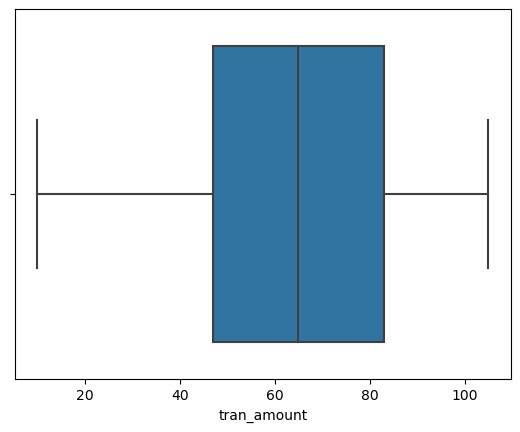

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x=df['tran_amount'])
plt.show()

In [19]:
#creating new column
df['Month']=df['trans_date'].dt.month

In [20]:
df

,customer_id,trans_date,tran_amount,response,Month
0,CS5295,2013-02-11,35,1,2
1,CS4768,2015-03-15,39,1,3
2,CS2122,2013-02-26,52,0,2
3,CS1217,2011-11-16,99,0,11
4,CS1850,2013-11-20,78,0,11
...,...,...,...,...,...
124995,CS8433,2011-06-26,64,0,6
124996,CS7232,2014-08-19,38,0,8
124997,CS8731,2014-11-28,42,0,11
124998,CS8133,2013-12-14,13,0,12


In [21]:
# 3 months which has highest trans amount
monthly_sales= df.groupby('Month')['tran_amount'].sum()
monthly_sales= monthly_sales.sort_values(ascending=False).reset_index().head(3)
monthly_sales

,Month,tran_amount
0,8,726775
1,10,725058
2,1,724089


In [22]:
#customers having highest no of orders
customer_counts= df['customer_id'].value_counts().reset_index()
customer_counts.columns=['customer_id','count']

#sort
top5=customer_counts.sort_values(by='count',ascending=False).head(5)
top5

,customer_id,count
0,CS4424,39
1,CS4320,38
2,CS3799,36
3,CS3013,35
4,CS1215,35


<AxesSubplot:xlabel='customer_id', ylabel='count'>

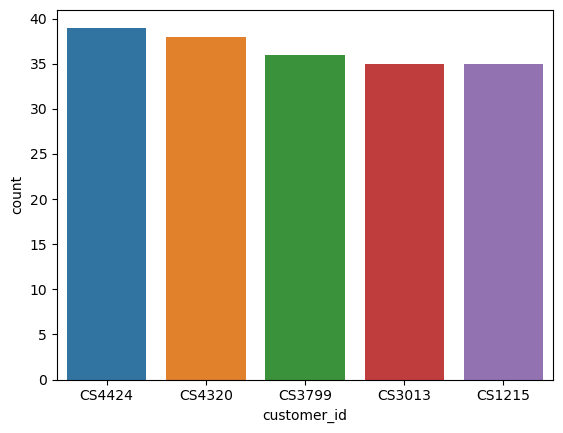

In [23]:
sns.barplot(x='customer_id',y='count',data=top5)

In [24]:
#group by customer
customer_sales= df.groupby('customer_id')['tran_amount'].sum().reset_index()
customer_sales
#sort
top5_sales=customer_sales.sort_values(by='tran_amount',ascending=False).head(5)
top5_sales

,customer_id,tran_amount
3312,CS4424,2933
3208,CS4320,2647
4640,CS5752,2612
3548,CS4660,2527
2687,CS3799,2513


<AxesSubplot:xlabel='customer_id', ylabel='tran_amount'>

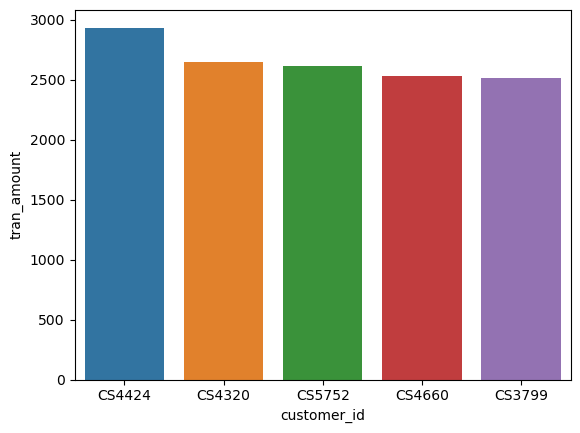

In [25]:
sns.barplot(x='customer_id',y='tran_amount',data=top5_sales)

# Time Series Analysis

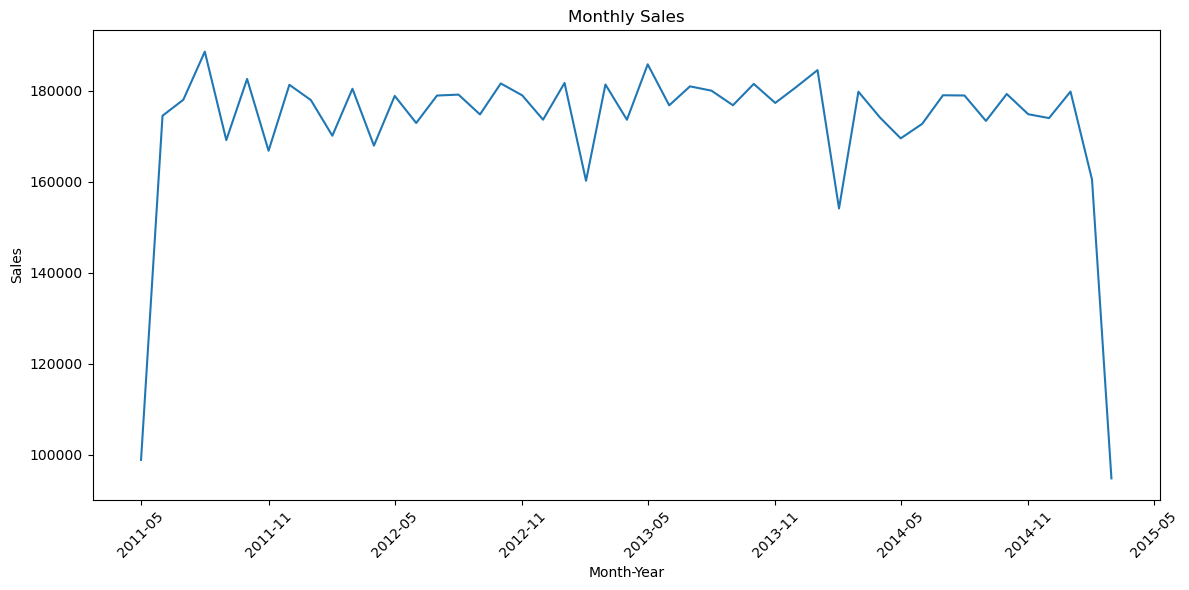

In [26]:
import matplotlib.dates as mdates

df['month_year']=df['trans_date'].dt.to_period('M')
monthly_sales=df.groupby('month_year')['tran_amount'].sum()

monthly_sales.index=monthly_sales.index.to_timestamp()

plt.figure(figsize=(12,6))
plt.plot(monthly_sales.index, monthly_sales.values)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.xlabel('Month-Year')
plt.ylabel('Sales')
plt.title('Monthly Sales')
plt.xticks(rotation=45)
plt.tight_layout()

In [27]:
df

,customer_id,trans_date,tran_amount,response,Month,month_year
0,CS5295,2013-02-11,35,1,2,2013-02
1,CS4768,2015-03-15,39,1,3,2015-03
2,CS2122,2013-02-26,52,0,2,2013-02
3,CS1217,2011-11-16,99,0,11,2011-11
4,CS1850,2013-11-20,78,0,11,2013-11
...,...,...,...,...,...,...
124995,CS8433,2011-06-26,64,0,6,2011-06
124996,CS7232,2014-08-19,38,0,8,2014-08
124997,CS8731,2014-11-28,42,0,11,2014-11
124998,CS8133,2013-12-14,13,0,12,2013-12


### Cohort Segmentation

In [28]:
#Recency
recency=df.groupby('customer_id')['trans_date'].max()
#.max()gives most recent value

#frequency
frequency=df.groupby('customer_id')['trans_date'].count()

#monetory
monetory=df.groupby('customer_id')['tran_amount'].sum()

#combine
rfm=pd.DataFrame({'recency':recency,'frequency':frequency,'monetory':monetory})

In [29]:
rfm

,recency,frequency,monetory
customer_id,,,
CS1112,2015-01-14,15,1012
CS1113,2015-02-09,20,1490
CS1114,2015-02-12,19,1432
CS1115,2015-03-05,22,1659
CS1116,2014-08-25,13,857
...,...,...,...
CS8996,2014-12-09,13,582
CS8997,2014-06-28,14,543
CS8998,2014-12-22,13,624


In [30]:
#customer segmentation
def segment_customer(row):
    if row['recency'].year>=2012 and row['frequency']>=15 and row['monetory']>1000:
        return 'P0'
    elif (2011<=row['recency'].year<2012) and (10<row['frequency']<15) and (500<=row['monetory']<=1000):
        return 'P1'
    else:
        return 'P2'
    
rfm['Segment']=rfm.apply(segment_customer, axis=1)

In [31]:
rfm

,recency,frequency,monetory,Segment
customer_id,,,,
CS1112,2015-01-14,15,1012,P0
CS1113,2015-02-09,20,1490,P0
CS1114,2015-02-12,19,1432,P0
CS1115,2015-03-05,22,1659,P0
CS1116,2014-08-25,13,857,P2
...,...,...,...,...
CS8996,2014-12-09,13,582,P2
CS8997,2014-06-28,14,543,P2
CS8998,2014-12-22,13,624,P2


# Churn Analysis

<AxesSubplot:>

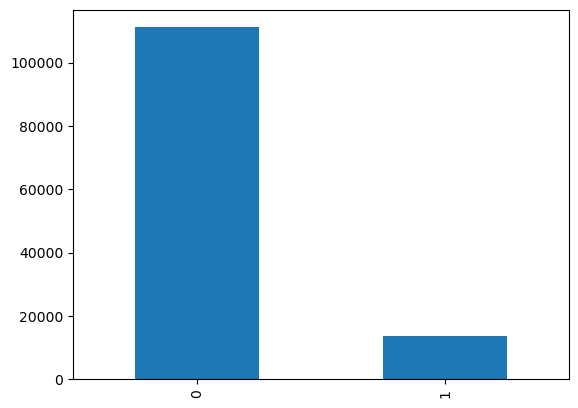

In [32]:
# count the numbers of churned and active customers
churn_counts=df['response'].value_counts()

churn_counts.plot(kind='bar')

<AxesSubplot:xlabel='month_year'>

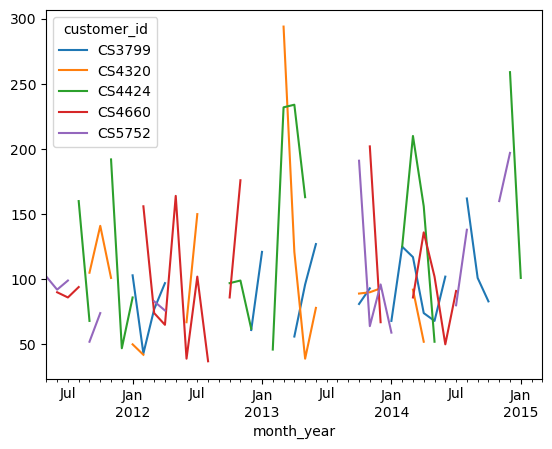

In [33]:
#Analyzing top 5 customer
top_5=monetory.sort_values(ascending=False).head(5).index

top_customers_df=df[df['customer_id'].isin(top_5)]

top_customer_sales=top_customers_df.groupby(['customer_id','month_year'])['tran_amount'].sum().unstack(level=0)
top_customer_sales.plot(kind='line')

In [34]:
df

,customer_id,trans_date,tran_amount,response,Month,month_year
0,CS5295,2013-02-11,35,1,2,2013-02
1,CS4768,2015-03-15,39,1,3,2015-03
2,CS2122,2013-02-26,52,0,2,2013-02
3,CS1217,2011-11-16,99,0,11,2011-11
4,CS1850,2013-11-20,78,0,11,2013-11
...,...,...,...,...,...,...
124995,CS8433,2011-06-26,64,0,6,2011-06
124996,CS7232,2014-08-19,38,0,8,2014-08
124997,CS8731,2014-11-28,42,0,11,2014-11
124998,CS8133,2013-12-14,13,0,12,2013-12


In [35]:
df.to_csv('MainData.csv')

In [37]:
rfm.to_csv('AdditionalData.csv')

In [36]:
rfm

,recency,frequency,monetory,Segment
customer_id,,,,
CS1112,2015-01-14,15,1012,P0
CS1113,2015-02-09,20,1490,P0
CS1114,2015-02-12,19,1432,P0
CS1115,2015-03-05,22,1659,P0
CS1116,2014-08-25,13,857,P2
...,...,...,...,...
CS8996,2014-12-09,13,582,P2
CS8997,2014-06-28,14,543,P2
CS8998,2014-12-22,13,624,P2


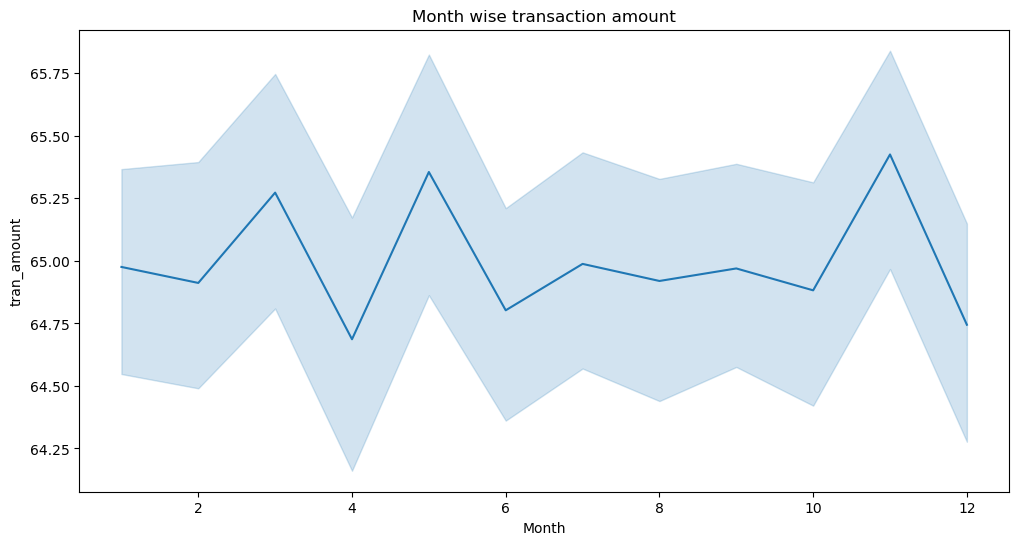

In [37]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Month',y='tran_amount',data=df)
plt.title('Month wise transaction amount')
plt.show()


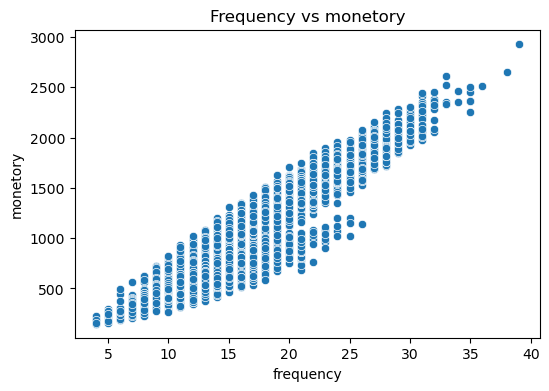

In [38]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='frequency',y='monetory',data=rfm)
plt.title('Frequency vs monetory')
plt.show()


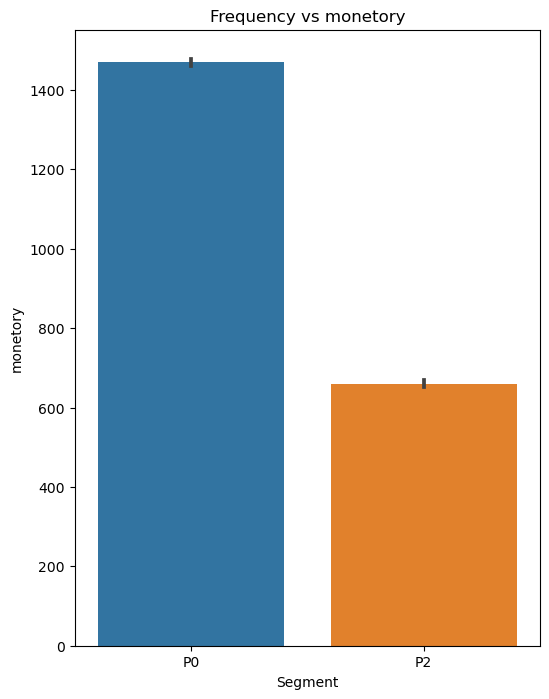

In [39]:
plt.figure(figsize=(6,8))
sns.barplot(x='Segment',y='monetory',data=rfm)
plt.title('Frequency vs monetory')
plt.show()
